In [1]:
import torch
import torchvision.datasets as dataset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random
import torch.optim as optim
import torch.nn.functional as F

In [16]:
fashion_train=dataset.FashionMNIST(root="data/FashionMNIST_data", # 데이터저장 위치
                          train=True,  # train data로 지정
                          transform=transforms.ToTensor(),# array-> torchTensor로 변환
                          download=True)
fashion_test=dataset.FashionMNIST(root="data/FashionMNIST_data", # 데이터저장 위치
                          train=False,  # test data로 지정
                          transform=transforms.ToTensor(),# array-> torchTensor로 변환
                          download=True) 

In [17]:
print('train:',fashion_train)
print('test:',fashion_test)

train: Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data/FashionMNIST_data
    Split: Train
    StandardTransform
Transform: ToTensor()
test: Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data/FashionMNIST_data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [18]:
import numpy as np
def plot(x, y):
  plt.figure(figsize=(8,10))
  for i in range(len(x)):
    plt.subplot(5,5,i+1)
    plt.title(y[i].item())
    img=np.array(x[i]).reshape(28,28)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
  plt.show()  
  

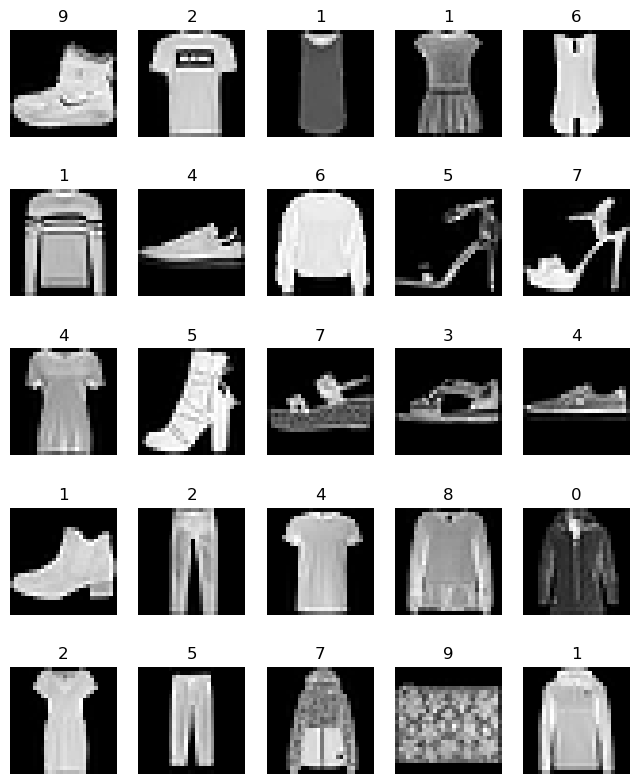

In [19]:
plot(fashion_train.data[:25], fashion_test.targets[:25])

In [20]:
x=fashion_train.data/255
print(x[0])
y=fashion_train.targets
print(y)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510, 0.2863, 0.0000,
         0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000

In [21]:
x=x.view(x.size(0), -1)
print(x.size(), y.size())
input_size=x.size(-1)
output_size=int(max(y))+1
print('input_size:%d, output_size:%d'%(input_size,output_size))

torch.Size([60000, 784]) torch.Size([60000])
input_size:784, output_size:10


In [22]:
# Train / Valid ratio
ratios = [.8, .2]

train_cnt = int(x.size(0) * ratios[0])
valid_cnt = int(x.size(0) * ratios[1])
test_cnt = len(fashion_test.data)
cnts = [train_cnt, valid_cnt]

print("Train %d / Valid %d / Test %d samples." % (train_cnt, valid_cnt, test_cnt))

indices = torch.randperm(x.size(0))

x = torch.index_select(x, dim=0, index=indices)
y = torch.index_select(y, dim=0, index=indices)

x = list(x.split(cnts, dim=0))
y = list(y.split(cnts, dim=0))

x += [(fashion_test.data.float() / 255.).view(test_cnt, -1)]
y += [fashion_test.targets]

for x_i, y_i in zip(x, y):
    print(x_i.size(), y_i.size())

Train 48000 / Valid 12000 / Test 10000 samples.
torch.Size([48000, 784]) torch.Size([48000])
torch.Size([12000, 784]) torch.Size([12000])
torch.Size([10000, 784]) torch.Size([10000])


In [23]:
model = nn.Sequential(
    nn.Linear(input_size, 500),
    nn.LeakyReLU(),
    nn.Linear(500, 400),
    nn.LeakyReLU(),
    nn.Linear(400, 300),
    nn.LeakyReLU(),
    nn.Linear(300, 200),
    nn.LeakyReLU(),
    nn.Linear(200, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 50),
    nn.LeakyReLU(),
    nn.Linear(50, output_size),
    nn.LogSoftmax(dim=-1),
)

model

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=500, out_features=400, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=400, out_features=300, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=300, out_features=200, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=200, out_features=100, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=100, out_features=50, bias=True)
  (11): LeakyReLU(negative_slope=0.01)
  (12): Linear(in_features=50, out_features=10, bias=True)
  (13): LogSoftmax(dim=-1)
)

In [24]:
crit = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())

In [25]:
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')

In [26]:
model = model.to(device)

x = [x_i.to(device) for x_i in x]
y = [y_i.to(device) for y_i in y]

In [27]:
n_epochs = 1000
batch_size = 256
print_interval = 10

In [28]:
from copy import deepcopy

lowest_loss = np.inf
best_model = None

early_stop = 50
lowest_epoch = np.inf

In [29]:
train_history, valid_history = [], []

for i in range(n_epochs):
    indices = torch.randperm(x[0].size(0)).to(device)
    x_ = torch.index_select(x[0], dim=0, index=indices)
    y_ = torch.index_select(y[0], dim=0, index=indices)
    
    x_ = x_.split(batch_size, dim=0)
    y_ = y_.split(batch_size, dim=0)
    
    train_loss, valid_loss = 0, 0
    y_hat = []
    
    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = crit(y_hat_i, y_i.squeeze())

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()        
        train_loss += float(loss) # This is very important to prevent memory leak.

    train_loss = train_loss / len(x_)
        
    with torch.no_grad():
        x_ = x[1].split(batch_size, dim=0)
        y_ = y[1].split(batch_size, dim=0)
        
        valid_loss = 0
        
        for x_i, y_i in zip(x_, y_):
            y_hat_i = model(x_i)
            loss = crit(y_hat_i, y_i.squeeze())
            
            valid_loss += float(loss)
            
            y_hat += [y_hat_i]
            
    valid_loss = valid_loss / len(x_)
    
    train_history += [train_loss]
    valid_history += [valid_loss]
        
    if (i + 1) % print_interval == 0:
        print('Epoch %d: train loss=%.4e  valid_loss=%.4e  lowest_loss=%.4e' % (
            i + 1,
            train_loss,
            valid_loss,
            lowest_loss,
        ))
        
    if valid_loss <= lowest_loss:
        lowest_loss = valid_loss
        lowest_epoch = i
        
        best_model = deepcopy(model.state_dict())
    else:
        if early_stop > 0 and lowest_epoch + early_stop < i + 1:
            print("There is no improvement during last %d epochs." % early_stop)
            break

print("The best validation loss from epoch %d: %.4e" % (lowest_epoch + 1, lowest_loss))
model.load_state_dict(best_model)

Epoch 10: train loss=2.5300e-01  valid_loss=3.1411e-01  lowest_loss=3.2042e-01
Epoch 20: train loss=1.8164e-01  valid_loss=3.2810e-01  lowest_loss=3.0965e-01
Epoch 30: train loss=1.3227e-01  valid_loss=3.8718e-01  lowest_loss=3.0965e-01
Epoch 40: train loss=1.0120e-01  valid_loss=4.6742e-01  lowest_loss=3.0965e-01
Epoch 50: train loss=7.7989e-02  valid_loss=5.6486e-01  lowest_loss=3.0965e-01
Epoch 60: train loss=6.0552e-02  valid_loss=5.1638e-01  lowest_loss=3.0965e-01
There is no improvement during last 50 epochs.
The best validation loss from epoch 13: 3.0965e-01


<All keys matched successfully>

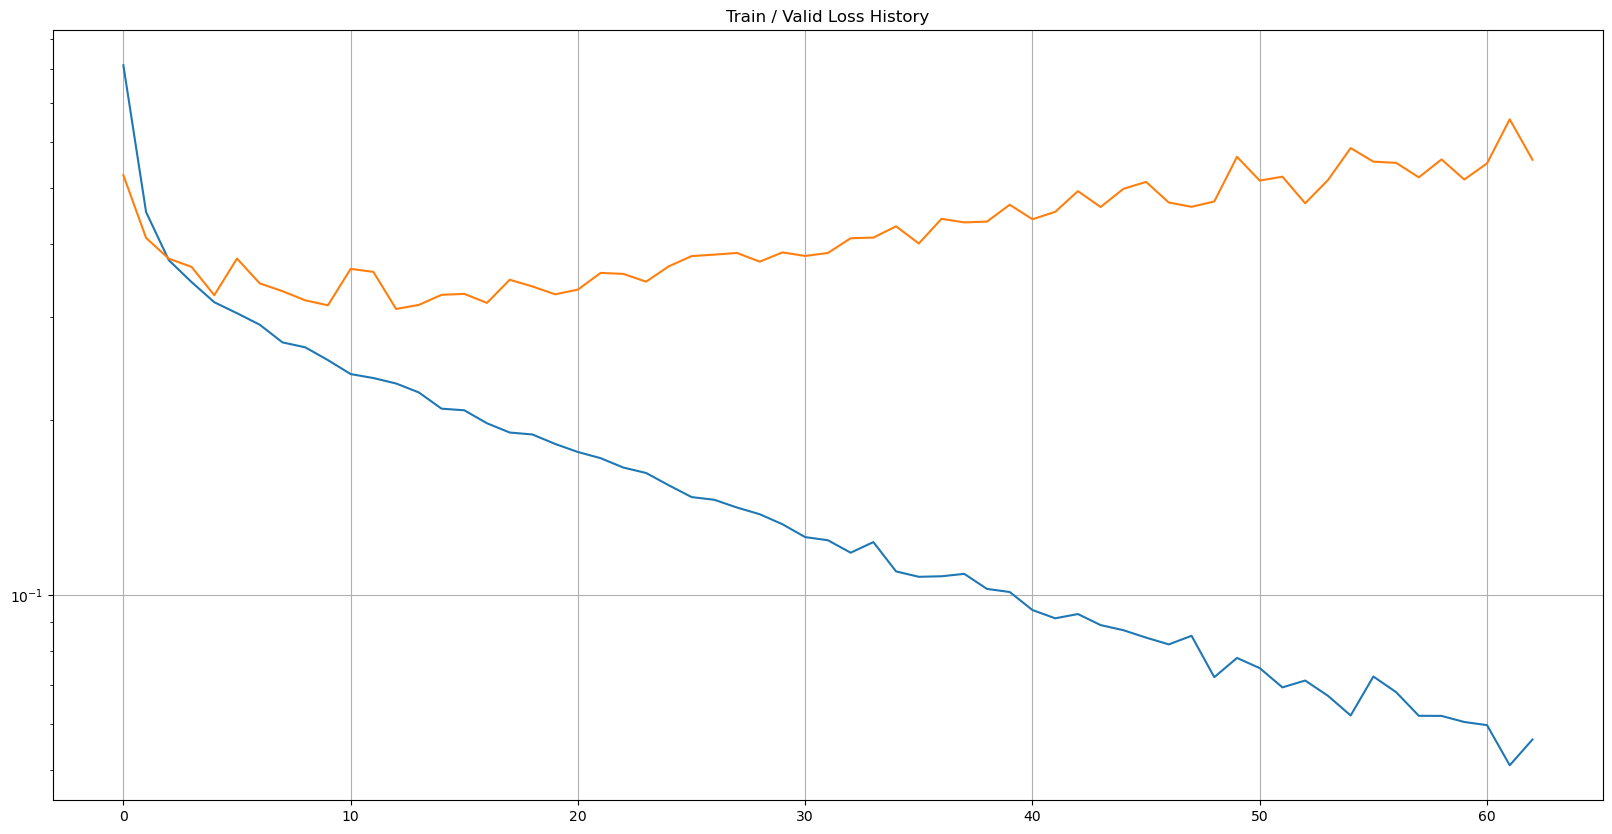

In [30]:
plot_from = 0

plt.figure(figsize=(20, 10))
plt.grid(True)
plt.title("Train / Valid Loss History")
plt.plot(
    range(plot_from, len(train_history)), train_history[plot_from:],
    range(plot_from, len(valid_history)), valid_history[plot_from:],
)
plt.yscale('log')
plt.show()

In [31]:
test_loss = 0
y_hat = []

with torch.no_grad():
    x_ = x[-1].split(batch_size, dim=0)
    y_ = y[-1].split(batch_size, dim=0)

    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = crit(y_hat_i, y_i.squeeze())

        test_loss += loss # Gradient is already detached.

        y_hat += [y_hat_i]

test_loss = test_loss / len(x_)
y_hat = torch.cat(y_hat, dim=0)

print("Validation loss: %.4e" % test_loss)

Validation loss: 3.2908e-01


In [32]:
correct_cnt = (y[-1].squeeze() == torch.argmax(y_hat, dim=-1)).sum()
total_cnt = float(y[-1].size(0))

print('Accuracy: %.4f' % (correct_cnt / total_cnt))

Accuracy: 0.8845


In [33]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y[-1], torch.argmax(y_hat, dim=-1)),
             index=['true_%d' % i for i in range(10)],
             columns=['pred_%d' % i for i in range(10)])

,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9
true_0,819,3,16,27,4,0,119,0,12,0
true_1,1,975,0,19,2,0,2,0,1,0
true_2,6,0,825,16,95,0,57,0,1,0
true_3,24,10,9,922,11,0,19,0,5,0
true_4,0,1,101,56,803,0,34,0,5,0
true_5,0,0,0,0,0,949,0,28,3,20
true_6,104,3,109,32,86,0,658,0,8,0
true_7,0,0,0,0,0,16,0,968,0,16
true_8,4,0,1,4,3,2,2,2,982,0
true_9,0,0,0,1,0,6,1,48,0,944
